# Problem Identification

## a. Background

[John](https://github.com/mikepars) is a data analyst at a company called Dumbell, a dating app where everyone can create their own accounts and profiles to meet and interact with others. Dumbell wants to launch a new program called speed dating, where individuals can join the program at specific times and will be randomly paired with others to interact via chat for 5 minutes. If they find a connection with each other, they can continue chatting through the app's direct message feature, and if not, they can move on.

The idea of speed dating itself is an event format designed for singles to meet and interact with each other within a short time frame. Dumbell wants to implement the speed dating program because many people want to form special relationships with others but don't want to waste time getting to know and getting closer to someone. Additionally, Dumbell aims to use this program as a new method to attract new users and as a new revenue stream, as Dumbell wants every user who wants to participate to subscribe to a paid membership. However, for the speed dating program to become a paid program, Dumbell needs to ensure that the majority of participants can make new acquaintances through the speed dating program.

## b. SMART Framework

**S | Specific**

Create a speed dating program for the Dumbell dating app.

**M | Measurable**

* The number of people downloading the Dumbell app increases by 30% within 1 month.
* The number of people closing their accounts due to not finding a match decreases by 15%.
* The number of people subscribing to the paid membership increases by 20%.

**A | Achievable**

* Analyze the dataset regarding existing speed dating programs.
* Determine whether the speed dating program is feasible as a paid program.

**R | Relevant**

* The requirement to participate in the speed dating program is to subscribe to Dumbell's paid membership. This can become a new revenue stream for Dumbell.
* If participants make new acquaintances through speed dating, this could encourage more people to use Dumbell.

**T | Timebound**

* The program is expected to be available within 6 months.

## c. Problem Statement


1. What are the main factors that determine someone's success in speed dating?
2. What is the percentage chance of someone with below-average appearance making a new acquaintance?
3. Does someone's income play an important role in speed dating?

# Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [3]:
df = pd.read_csv('speed_data_data.csv') # Load data

# Data Cleaning

<Axes: >

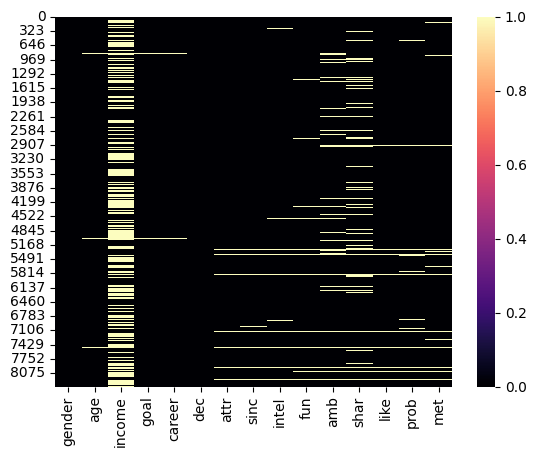

In [4]:
sns.heatmap(data = df.isnull(), cmap = 'magma') # Melihat jumlah missing value pada dataset dalam bentuk visualisasi

In [5]:
df.dropna(inplace=True, how = 'any')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 0 to 8355
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  3501 non-null   int64  
 1   age     3501 non-null   float64
 2   income  3501 non-null   float64
 3   goal    3501 non-null   float64
 4   career  3501 non-null   object 
 5   dec     3501 non-null   int64  
 6   attr    3501 non-null   float64
 7   sinc    3501 non-null   float64
 8   intel   3501 non-null   float64
 9   fun     3501 non-null   float64
 10  amb     3501 non-null   float64
 11  shar    3501 non-null   float64
 12  like    3501 non-null   float64
 13  prob    3501 non-null   float64
 14  met     3501 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 437.6+ KB


In [7]:
conds = [df['goal'] == 1, df['goal'] == 2, df['goal'] == 3, df['goal'] == 4, df['goal'] == 5. , df['goal'] == 6]
choice = ['seemed like a fun night out', 'to met new people', 'to get new date', 'looking for a serious relationship', 'to say i did it', 'etc']
df['goal'] = np.select(conds,choice)

In [8]:
df.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,to met new people,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,to met new people,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
3,0,21.0,69487.0,to met new people,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,to met new people,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,to met new people,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0


In [9]:
df.describe()

,gender,age,income,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,3501.00000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.00000
mean,0.42445,25.869466,45451.926878,0.404742,6.188946,7.286632,7.498857,6.382319,6.858469,5.386889,6.104599,5.128678,1.00457
std,0.49433,3.556055,17350.471105,0.490912,1.952161,1.740001,1.554716,1.980044,1.814239,2.124161,1.868700,2.195696,0.98560
min,0.00000,18.000000,8607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,23.000000,31809.000000,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.00000
50%,0.00000,26.000000,45017.000000,0.000000,6.000000,7.000000,8.000000,7.000000,7.000000,5.000000,6.000000,5.000000,1.00000
75%,1.00000,28.000000,55080.000000,1.000000,8.000000,8.000000,9.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.00000
max,1.00000,55.000000,109031.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.00000


# Data Analysis

<Axes: xlabel='dec', ylabel='count'>

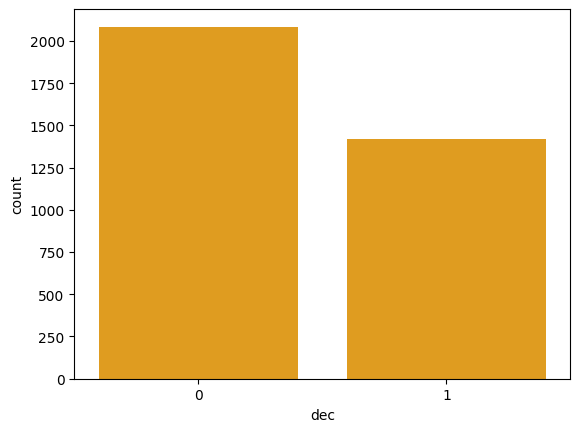

In [10]:
sns.countplot(data = df, x = 'dec', color = 'orange')

In [11]:
a = (len(df[df['dec'] == 1]) / len(df[df['dec'] == 0]) * 100).__round__(2)
print(f"Percentage of people their partner thinks they are a match: {a}%")

Percentage of people their partner thinks they are a match: 67.99%


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'to met new people'),
  Text(1, 0, 'seemed like a fun night out'),
  Text(2, 0, 'to get new date'),
  Text(3, 0, 'etc'),
  Text(4, 0, 'to say i did it'),
  Text(5, 0, 'looking for a serious relationship')])

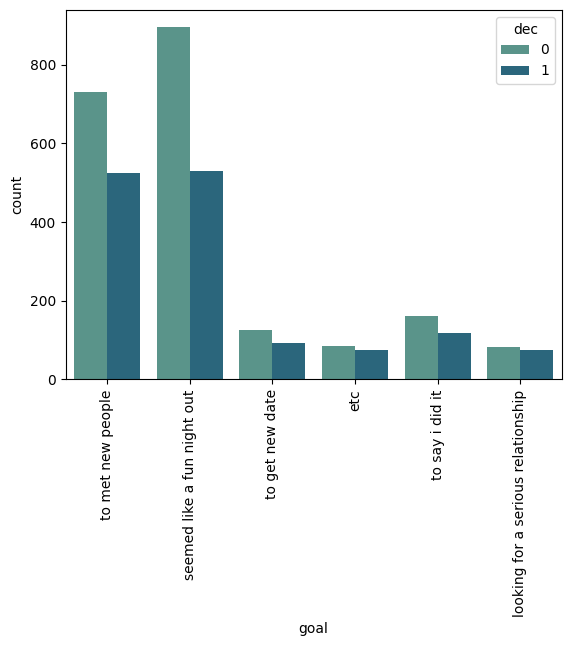

In [12]:
sns.countplot(data = df, x = 'goal', hue = 'dec', palette = 'crest')
plt.xticks(rotation = 90)

**Explanation**   
Out of the 6 reasons for joining speed dating mentioned above, many people want to participate simply out of curiosity. It seems that joining speed dating is an interesting activity for them. This is followed by the next reason, which is the desire to meet new people.

C:\Users\PC\AppData\Local\Temp\ipykernel_28732\3039668231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['income'])


<Axes: ylabel='Density'>

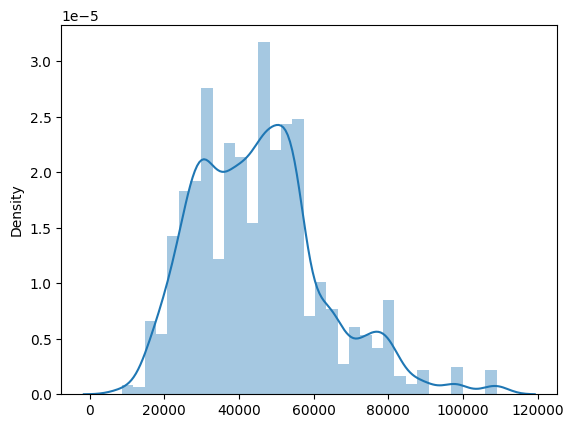

In [13]:
sns.distplot(x = df['income'])

<Axes: >

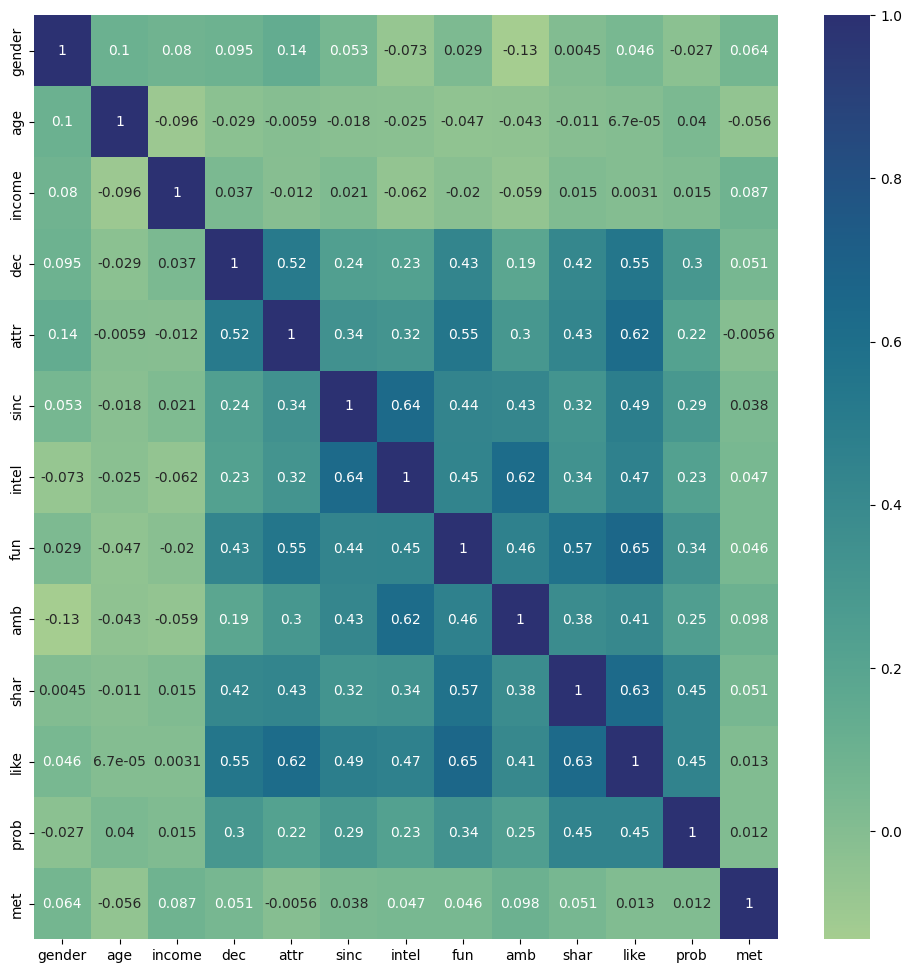

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(numeric_only=True, method = 'spearman'), annot=True, cmap = 'crest')

The heatmap above shows the correlation between continuous and ordinal variables. I chose Spearman's correlation method because the variables displayed are continuous and ordinal. Here are some points that can be drawn from the data visualization above:

* The variable "shar" (*shared interest*) has a moderate correlation with "fun" (the level of enjoyment someone experiences), suggesting that if both participants have the same hobbies and passions, it is easier for them to build chemistry.
* Gender, age, income, and the indicator variable of whether they have met before or not all do not correlate with the choice of the partner if the partner wants to continue the relationship with that individual or not.
* The aspect "attr" (attractiveness) has the highest correlation with the indicator variable of whether they have met before or not, followed by the level of enjoyment, intelligence, and sincerity of a person.

In [22]:
attr_dist = df['attr'].sort_values(ascending=True).to_numpy()
fun_dist = df['fun'].sort_values(ascending=True).to_numpy()
sinc_dist = df['sinc'].sort_values(ascending=True).to_numpy()
intel_dist = df['intel'].sort_values(ascending=True).to_numpy()
amb_dist = df['amb'].sort_values(ascending=True).to_numpy()
shar_dist = df['shar'].sort_values(ascending=True).to_numpy()
like_dist = df['like'].sort_values(ascending=True).to_numpy()
prob_dist = df['prob'].sort_values(ascending=True).to_numpy()
inc_dist = df['income'].sort_values(ascending=True).to_numpy()

attr_lst = []
fun_lst = []
sinc_lst = []
intel_lst = []
amb_list = []
shar_lst = []
like_lst = []
prob_lst = []
inc_lst = []




lists = [attr_lst, fun_lst, sinc_lst, intel_lst, amb_list, shar_lst, like_lst, prob_lst, inc_lst]
dists = [attr_dist, fun_dist, sinc_dist, intel_dist, amb_dist, shar_dist, like_dist, prob_dist, inc_dist]

n = -1

for dst in dists:
    n += 1
    lists[n].append(dst.mean().round(2))                                                            # Mean                     0
    lists[n].append(np.median(dst).round(2))                                                        # Median                   1
    lists[n].append(st.mode(dst)[0])                                                                   # Mode                     2
    lists[n].append(dst.std().round(2))                                                             # Standard Deviation       3
    lists[n].append(st.skew(dst).round(2))                                                          # Skewness                 4
    lists[n].append(st.kurtosis(dst).round(2))                                                      # Kurtosis                 5
    lists[n].append(np.quantile(dst, 0.25).round(2))                                                # Q1                       6
    lists[n].append(np.quantile(dst, 0.75).round(2))                                                # Q3                       7
    lists[n].append(st.iqr(dst).round(2))                                                           # IQR                      8
    if abs(lists[n][4]) < 0.5:
        lists[n].append(lists[n][0]+(3*lists[n][3]))                                                # Upper bound              9
        lists[n].append(lists[n][0]-(3*lists[n][3]))                                                # Lower bound              10
    else:                                                                                           
        lists[n].append(lists[n][7] + (1.5*lists[n][8]))                                            # Upper bound              9
        lists[n].append(lists[n][6] - (1.5*lists[n][8]))                                            # Lower bound              10
        
        
    lists[n].append((len(dst[(dst < lists[n][10]) | (dst > lists[n][9])]) / len(dst)).__round__(2))  # Outlier%                 11
    
stats = pd.DataFrame()
stats['Category'] = ['Mean', 'Median', 'Mode', 'Std', 'Skew', 'Kurtosis', 'Q1', 'Q3', 'IQR', 'Upper bound', 'Lower bound', 'Outlier%']
stats['Income'] = lists[-1]
stats['Attractiveness'] = lists[0]
stats['Fun'] = lists[1]
stats['Sincerity'] = lists[2]
stats['Intelligent'] = lists[3]
stats['Ambitiousness'] = lists[4]
stats['Shared Interest'] = lists[5]
stats['Partner Like on Subject'] = lists[6]
stats['Probability'] = lists[7]

In [23]:
stats

,Category,Income,Attractiveness,Fun,Sincerity,Intelligent,Ambitiousness,Shared Interest,Partner Like on Subject,Probability
0,Mean,45451.93,6.19,6.38,7.29,7.50,6.86,5.39,6.10,5.13
1,Median,45017.00,6.00,7.00,7.00,8.00,7.00,5.00,6.00,5.00
2,Mode,55080.00,6.00,7.00,8.00,8.00,7.00,5.00,7.00,5.00
3,Std,17347.99,1.95,1.98,1.74,1.55,1.81,2.12,1.87,2.20
4,Skew,0.76,-0.31,-0.44,-0.66,-0.55,-0.37,-0.12,-0.46,-0.06
5,Kurtosis,0.75,-0.14,-0.01,0.67,0.62,0.02,-0.35,0.05,-0.42
6,Q1,31809.00,5.00,5.00,6.00,7.00,6.00,4.00,5.00,4.00
7,Q3,55080.00,8.00,8.00,8.00,9.00,8.00,7.00,7.00,7.00
8,IQR,23271.00,3.00,3.00,2.00,2.00,2.00,3.00,2.00,3.00
9,Upper bound,89986.50,12.04,12.32,11.00,12.00,12.29,11.75,11.71,11.73


In [17]:
df.rename(columns={'Rating' : 'Sincerity'}, inplace=True)

<Axes: xlabel='fun', ylabel='like'>

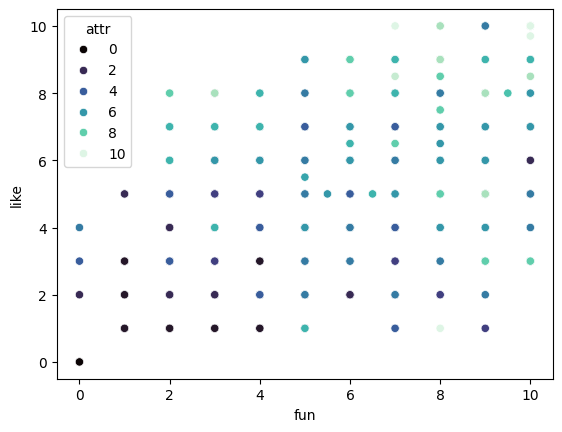

In [18]:
sns.scatterplot(data = df, x = 'fun', y = 'like', hue = 'attr', palette = 'mako')

In [19]:
df.to_csv('michaelparsaoran.csv')

In [20]:
catg = ['Attractiveness', 'Sincerity', 'Intelligent', 'Fun', 'Ambitiousness', 'Shared Interest'] # Variabel - variabel yang mau dilihat hasilnya
above = []
below = []
pa = []
pb = []

for cat in ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']:
    above.append((len(df[(df[cat] > df[cat].median()) & (df['dec'] == 1)]) / len(df) * 100).__round__(2))
    below.append((len(df[(df[cat] <= df[cat].median()) & (df['attr'] <= df['attr'].median()) & (df['dec'] == 1)]) / len(df) * 100).__round__(2))
    pa.append(len(df[(df[cat] > df[cat].median()) & (df['dec'] == 1)]))
    pb.append(len(df[(df[cat] <= df[cat].median()) & (df['dec'] == 1)]))
    
chance = pd.DataFrame()
chance['Category'] = catg
chance['Above Median'] = above
chance['Below Median'] = below
chance['People Above Median'] = pa
chance['People Below Median'] = pb

In [21]:
chance

,Category,Above Median,Below Median,People Above Median,People Below Median
0,Attractiveness,29.79,10.68,1043,374
1,Sincerity,24.71,5.74,865,552
2,Intelligent,13.54,8.23,474,943
3,Fun,19.97,7.43,699,718
4,Ambitiousness,18.51,7.34,648,769
5,Shared Interest,27.65,4.43,968,449


Dari tabel ini dapat ditarik beberapa kesimpulan:
* Partisipan dengan ketampanan dibawah rata - rata (bottom half) hanya memiliki peluang 10% untuk mendapatkan hubungan baru dengan lawan pasangan setelah speed dating.
* Jika partisipan memiliki wajah dibawah rata & rata dengan sifat - sifat lain yang tidak diukur, maka peluangnya tetap kecil.

# Conclusion

* Gender, age, income, and the indicator variable of whether they have met before or not all do not correlate with the partner's choice of whether they want to continue the relationship with that individual or not.
* The aspect "attr" (attractiveness) has the highest correlation with the indicator variable of whether they have met before or not, followed by the level of enjoyment, intelligence, and sincerity of a person.
* If participants have average or below-average looks (lower half of the population), their chances of forming a new relationship are very low, below 10%.
* In my opinion, the speed dating program can still be implemented because there is significant interest despite these facts. However, it is better not to make the speed dating program a paid or subscription-based program, as speed dating does not guarantee that individuals with average or below-average looks will form new relationships.

**Tableau**

https://public.tableau.com/app/profile/michael.parsaoran/viz/Book3_17152712137530/Dashboard1
